Step 1 : Import Library

In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Step 2: Load Dataset

In [6]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

Step 3: Preprocessing the Dataset

In [7]:
print("Missing values: ", X.isnull().sum())
if X.isnull().sum().sum() == 0:
  print("No missing values")
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print("\nScaled feature (Top 5 Rows): ")
print(X.head())

Missing values:  mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64
No missing values

Scaled feature (Top 5 Rows): 
   mean radius  mean texture  mean perimeter  mean 

Step 4: Explore Data

In [8]:
print("\nClass distirbution (0: malignant, 1: benign): ")
print(y.value_counts(normalize = True))
plt.figure(figsize = (6, 4))
sns.countplot(x = y)
plt.title("Class Distribution (0: Malignant, 1: Benign)")
plt.show()


Class distirbution (0: malignant, 1: benign): 
1    0.627417
0    0.372583
Name: proportion, dtype: float64


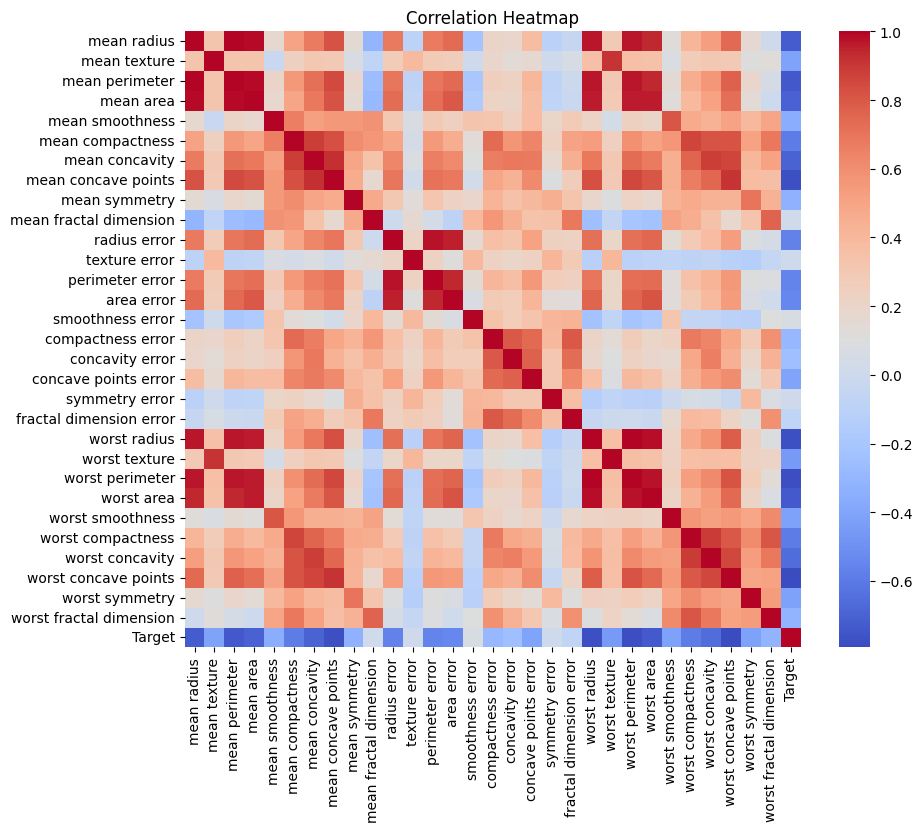

In [9]:
data_temp = X.copy()
data_temp['Target'] = y
corr_matrix = data_temp.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = False, cmap = 'coolwarm', square = True)
plt.title("Correlation Heatmap")
plt.show()

Step 5: Split the Data in to training and testing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(f"Training samples: {len(X_train)}, Training samples: {len(X_test)}")

Training samples: 455, Training samples: 114


Step 6: Train Logistic Regression Model

In [15]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state = 42)
model_lr.fit(X_train, y_train)
print("Coefficients: ", model_lr.coef_)
print("Intercept: ", model_lr.intercept_)

Coefficients:  [[-0.43464701 -0.39719369 -0.39606985 -0.46999027 -0.06739432  0.52671658
  -0.80767618 -1.1077114   0.24153785  0.07844689 -1.25057276  0.1889927
  -0.58988574 -0.91987672 -0.31656977  0.66906627  0.17107672 -0.31431731
   0.50499861  0.61176062 -0.87394431 -1.35751246 -0.58604724 -0.83803013
  -0.54737794  0.00589749 -0.95168648 -0.78040785 -1.19559714 -0.16293183]]
Intercept:  [0.32857199]


Step 7: Evalute Model Performance

In [18]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, roc_auc_score, roc_curve)
y_pred_lr = model_lr.predict(X_test)
print("Logistic Regression Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, model_lr.predict_proba(X_test)[:, 1]):.2f}")

Logistic Regression Evaluation Metrics:
Accuracy: 0.97
Precision: 0.97
Recall: 0.99
F1 Score: 0.98
ROC AUC: 1.00


Step 8: Visualize Predictions

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [21]:
model_lr_pca = LogisticRegression().fit(X_train_pca, y_train)

In [22]:
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model_lr_pca.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

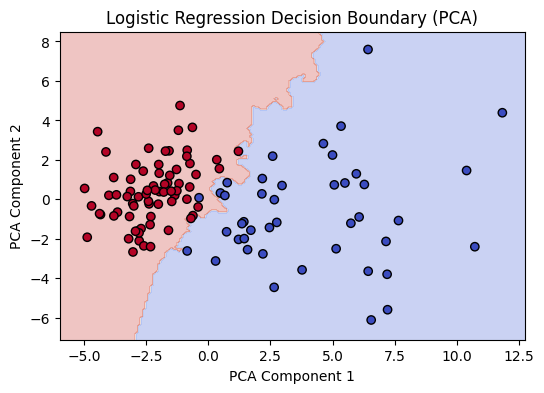

In [33]:
plt.figure(figsize=(6, 4))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', edgecolor='k')
plt.title("Logistic Regression Decision Boundary (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

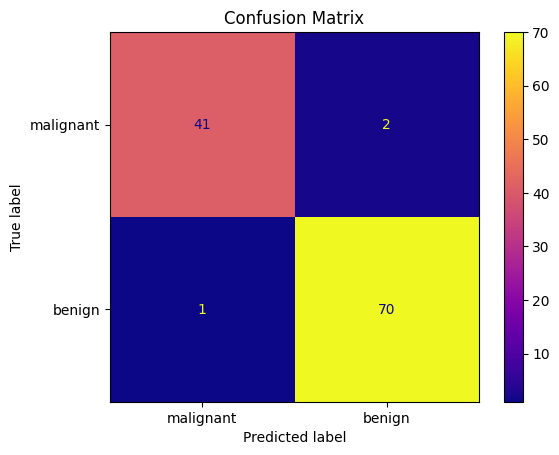

In [24]:
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = data.target_names)
disp.plot(cmap = plt.cm.plasma)
plt.title('Confusion Matrix')
plt.show()

Step 9: Train KNN Model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

Step 10: Evaluate Model Performance

In [26]:
y_pred_knn = model_knn.predict(X_test)
print("KNN Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1]):.2f}")

KNN Metrics:
Accuracy: 0.95
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
ROC AUC: 0.98


Step 11: Visualize Predictions

In [27]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [28]:
model_knn_pca = KNeighborsClassifier(n_neighbors=5).fit(X_train_pca, y_train)

In [29]:
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model_knn_pca.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

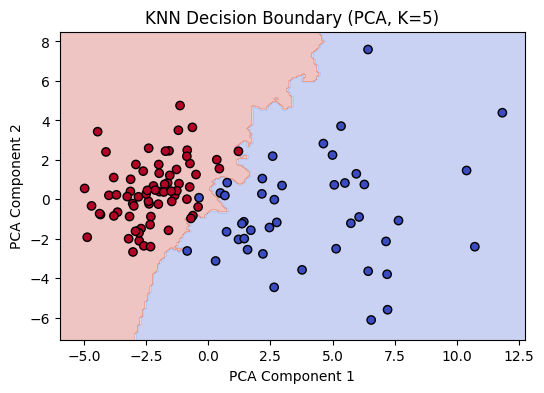

In [30]:
plt.figure(figsize=(6, 4))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', edgecolor='k')
plt.title("KNN Decision Boundary (PCA, K=5)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

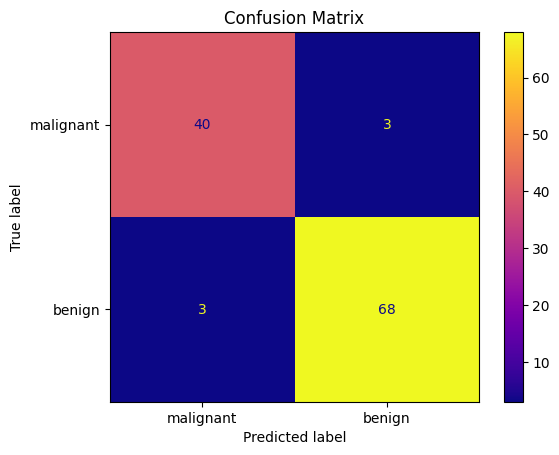

In [31]:
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.plasma)
plt.title("Confusion Matrix")
plt.show()

Step 12: Experiment with Differents Values

In [32]:
for k in [1, 5, 10]:
    model_knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred_knn = model_knn.predict(X_test)
    print(f"KNN (K={k}) Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}, F1: {f1_score(y_test, y_pred_knn):.2f}")

KNN (K=1) Metrics:
Accuracy: 0.94, F1: 0.95
KNN (K=5) Metrics:
Accuracy: 0.95, F1: 0.96
KNN (K=10) Metrics:
Accuracy: 0.96, F1: 0.96
